In [9]:
import os
import shutil
import pandas as pd
import ast
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

# Clean and parse labels from the metadata CSV
def clean_and_parse_labels(label_string):
    if isinstance(label_string, str):
        # Convert something like ['Arable land' 'Broad-leaved forest'] into
        # ["Arable land", "Broad-leaved forest"] so it can be parsed
        cleaned_labels = label_string.replace(" '", ", '")  # Insert commas
        # We could do additional cleaning if needed, e.g. removing extra brackets
        return ast.literal_eval(cleaned_labels)
    return label_string

# Function to create multi-label balanced subsets
def createMultiLabelSubsets(dataset_dir, subset_dir, metadata_df, percentage):
    # 1) Clean and parse labels so they're valid Python lists
    metadata_df['labels'] = metadata_df['labels'].apply(clean_and_parse_labels)

    # 2) Convert labels to a multi-label binary matrix
    #    At this point, each row's 'labels' should be a Python list.
    label_list = metadata_df['labels']
    unique_labels = sorted(set(label for labels in label_list for label in labels))
    
    # Create binary label representation
    multilabel_matrix = pd.DataFrame(0, index=metadata_df.index, columns=unique_labels)
    for idx, labels in enumerate(label_list):
        # Set to 1 for all labels present in the row
        multilabel_matrix.loc[idx, labels] = 1
    
    # 3) Perform Multi-Label Stratified Sampling
    msss = MultilabelStratifiedShuffleSplit(
        n_splits=1, 
        test_size=(100 - percentage) / 100, 
        random_state=42
    )
    
    for train_idx, _ in msss.split(metadata_df, multilabel_matrix):
        metadata_subset = metadata_df.iloc[train_idx]
    
    # 4) Create the output subset directory if it doesn't exist
    subset_path = os.path.join(subset_dir, f'{percentage}_percent')
    if not os.path.exists(subset_path):
        os.makedirs(subset_path)
        print(f"Created subset: {subset_path}")
    
    # 5) Copy .tif files for the selected image patches
    missing_files = []
    for patch_id in metadata_subset['patch_id']:
        src_file = os.path.join(dataset_dir, f"{patch_id}.tif")
        dst_file = os.path.join(subset_path, f"{patch_id}.tif")
        
        if os.path.exists(src_file):
            shutil.copy2(src_file, dst_file)
        else:
            missing_files.append(patch_id)
    
    # 6) Save updated metadata
    metadata_subset.to_csv(os.path.join(subset_dir, f'metadata_{percentage}_percent.csv'), index=False)
    print(f"Subset {percentage}% created with {len(metadata_subset)} patches.")
    
    # 7) Warn if any files are missing
    if missing_files:
        print(f"Warning: {len(missing_files)} .tif files were missing and not copied.")


if __name__ == "__main__":
    dataset_dir = r"D:\100%_BigEarthNet"
    subset_dir = r"C:\Users\isaac\Desktop\BigEarthTests\Subset_Test"
    
    # Load your original metadata CSV
    metadata_df = pd.read_csv(r"C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv")
    
    createMultiLabelSubsets(dataset_dir, subset_dir, metadata_df, percentage=5)


Created subset: C:\Users\isaac\Desktop\BigEarthTests\Subset_Test\5_percent
Subset 5% created with 24041 patches.


In [ ]:
# Function to count the number of images per label
def countImagesPerLabel(metadata_df):
    label_counts = {}
    for labels in metadata_df['labels'].apply(lambda x: eval(x) if isinstance(x, str) else x):
        for label in labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
    
    label_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    
    print("Label\tNumber of Images")
    for label, count in label_counts:
        print(f"{label}\t{count}")
    print(f"Total Images\t{len(metadata_df)}")

metadata_df = pd.read_csv(r"C:\Users\isaac\Desktop\BigEarthTests\Subset_Test\metadata_5_percent.csv")
metadata_df_original = pd.read_csv(r"C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv")
countImagesPerLabel(metadata_df)

In [ ]:
# Function to clean and parse labels from the metadata CSV
def clean_and_parse_labels(label_string):
    if isinstance(label_string, str):
        cleaned_labels = label_string.replace(" '", ", '")  # Insert commas
        return ast.literal_eval(cleaned_labels)
    return label_string

# Function to count the number of images per label
def countImagesPerLabel(metadata_df):
    label_counts = {}
    for labels in metadata_df['labels'].apply(lambda x: clean_and_parse_labels(x)):
        for label in labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
    
    label_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    
    print("Label\tNumber of Images")
    for label, count in label_counts:
        print(f"{label}\t{count}")
    print(f"Total Images\t{len(metadata_df)}")

metadata_df_original = pd.read_csv(r"C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv")
countImagesPerLabel(metadata_df_original)

Label	Number of Images
Arable land	9452
Mixed forest	8258
Coniferous forest	7739
Transitional woodland, shrub	7066
Broad-leaved forest	6830
Land principally occupied by agriculture, with significant areas of natural vegetation	6150
Complex cultivation patterns	5027
Pastures	4783
Urban fabric	3199
Inland waters	3090
Marine waters	3076
Agro-forestry areas	1678
Permanent crops	1522
Inland wetlands	1045
Moors, heathland and sclerophyllous vegetation	695
Natural grassland and sparsely vegetated areas	585
Industrial or commercial units	568
Beaches, dunes, sands	65
Coastal wetlands	62
Total Images	23950


In [26]:
import pandas as pd

# Path to the Parquet file
parquet_file_path = r'C:\Users\isaac\Downloads\metadata.parquet'

# Path to save the CSV file (change to a directory where you have write permissions)
csv_file_path = r'C:\Users\isaac\Downloads\metadata_converted.csv'

# Read the Parquet file
df = pd.read_parquet(parquet_file_path)

# Save the DataFrame as a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Parquet file has been converted to CSV and saved at {csv_file_path}")

Parquet file has been converted to CSV and saved at C:\Users\isaac\Downloads\metadata_converted.csv


In [2]:
dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\OnePBigEarthNetCopy'
subset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets'
metadata_file = r'C:\Users\isaac\Downloads\metadata.parquet'
unwanted_metadata_file = r'C:\Users\isaac\Downloads\metadata_for_patches_with_snow_cloud_or_shadow.parquet'
    
metadata_df = pd.read_parquet(metadata_file)
snow_cloud_metadata_df = pd.read_parquet(unwanted_metadata_file)

In [9]:
# Check if the labels are strings and need to be converted
if isinstance(DatasetConfig.metadata_csv['labels'].iloc[0], str):
    DatasetConfig.metadata_csv['labels'] = DatasetConfig.metadata_csv['labels'].apply(ast.literal_eval)

# Get unique class labels
class_labels = DatasetConfig.metadata_csv['labels'].explode().unique()

# Create a dictionary mapping class labels to indices
class_labels_dict = {label: idx for idx, label in enumerate(class_labels)}

# Create a reversed dictionary mapping indices to class labels
reversed_class_labels_dict = {idx: label for label, idx in class_labels_dict.items()}

print(class_labels_dict)
print(reversed_class_labels_dict)

NameError: name 'DatasetConfig' is not defined

In [36]:
# Get the number of images in each DataFrame
num_images_metadata = metadata_df.shape[0]
num_images_snow_cloud_metadata = snow_cloud_metadata_df.shape[0]

print(f"Number of images in metadata_df: {num_images_metadata}")
print(f"Number of images in snow_cloud_metadata_df: {num_images_snow_cloud_metadata}")
print(f"Total number of images: {num_images_metadata + num_images_snow_cloud_metadata}")

Number of images in metadata_df: 480038
Number of images in snow_cloud_metadata_df: 69450
Total number of images: 549488


In [ ]:
def resizeTiffFiles(input_tiff, output_tiff, new_width, new_height):
    with rasterio.open(input_tiff) as src:
        transform, width, height = calculate_default_transform(src.crs, src.crs, new_width, new_height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': src.crs,
            'transform': transform,
            'width': new_width,
            'height': new_height
        })
        with rasterio.open(output_tiff, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=src.crs,
                    resampling=Resampling.nearest
                )

In [ ]:
def resize_tiff_file(input_tiff, output_tiff, new_width=120, new_height=120):
    """Resize a single TIFF file."""
    with rasterio.open(input_tiff) as src:
        transform, width, height = calculate_default_transform(
            src.crs, src.crs, new_width, new_height, *src.bounds)
        
        # Update metadata for new width and height
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': src.crs,
            'transform': transform,
            'width': new_width,
            'height': new_height
        })
        
        # Write directly to the output file
        with rasterio.open(output_tiff, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=src.crs,
                    resampling=Resampling.nearest
                )

In [44]:
def createSubsets(dataset_dir, subsets, metadata_df, subset_dir):
    metadata_50 = pd.DataFrame(columns=metadata_df.columns)
    metadata_10 = pd.DataFrame(columns=metadata_df.columns)
    metadata_1 = pd.DataFrame(columns=metadata_df.columns)

    for subset in subsets.values():
        if not os.path.exists(subset):
            os.makedirs(subset)
            print(f"Created subset: {subset}")
        else:
            print(f"Subset already exists: {subset}")
    
    for folder in tqdm(os.listdir(dataset_dir), desc='Creating subsets'):
        folder_path = os.path.join(dataset_dir, folder)

        if os.path.isdir(folder_path):
            # List all subfolders
            subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

            # Calculate number of folders in each subset
            num_subfolders = len(subfolders)
            num_50_percent = min(max(1, num_subfolders // 2), num_subfolders)
            num_10_percent = min(max(1, num_subfolders // 10), num_subfolders)
            num_1_percent = min(max(1, num_subfolders // 100), num_subfolders)

            # Select random subfolders for each subset
            selected_50 = random.sample(subfolders, num_50_percent)
            selected_10 = random.sample(subfolders, num_10_percent)
            selected_1 = random.sample(subfolders, num_1_percent)

            # Filter metadata for each subset
            metadata_50 = pd.concat([metadata_50, metadata_df[metadata_df['patch_id'].isin(selected_50)]])
            metadata_10 = pd.concat([metadata_10, metadata_df[metadata_df['patch_id'].isin(selected_10)]])
            metadata_1 = pd.concat([metadata_1, metadata_df[metadata_df['patch_id'].isin(selected_1)]])

            # Copy selected subfolders to each subset directory
            for selected in selected_50:
                dest_path = os.path.join(subsets['50%'], folder, selected)
                if not os.path.exists(dest_path):  # Check if the destination folder exists
                    try:
                        shutil.copytree(os.path.join(folder_path, selected), dest_path)
                    except FileExistsError:
                        print(f"Directory already exists, skipping: {dest_path}")

            for selected in selected_10:
                dest_path = os.path.join(subsets['10%'], folder, selected)
                if not os.path.exists(dest_path):  # Check if the destination folder exists
                    try:
                        shutil.copytree(os.path.join(folder_path, selected), dest_path)
                    except FileExistsError:
                        print(f"Directory already exists, skipping: {dest_path}")
            
            for selected in selected_1:
                dest_path = os.path.join(subsets['1%'], folder, selected)
                if not os.path.exists(dest_path):  # Check if the destination folder exists
                    try:
                        shutil.copytree(os.path.join(folder_path, selected), dest_path)
                    except FileExistsError:
                        print(f"Directory already exists, skipping: {dest_path}")

    # Save metadata for each subset
    metadata_50.to_csv(os.path.join(subset_dir, 'metadata_50_percent.csv'), index=False)
    metadata_10.to_csv(os.path.join(subset_dir, 'metadata_10_percent.csv'), index=False)
    metadata_1.to_csv(os.path.join(subset_dir, 'metadata_1_percent.csv'), index=False)

In [45]:
def count_subfolders(base_dir, folder):
    # Dictionary to hold folder counts
    folder_counts = {}
    total_subfolders = 0  # Initialize total subfolder counter
    
    # Iterate through all folders in the base directory
    for folder in tqdm(os.listdir(base_dir), desc="Processing folders"):
        folder_path = os.path.join(base_dir, folder)
        
        # Check if the current path is a directory
        if os.path.isdir(folder_path):
            # Count subdirectories within this folder
            subfolder_count = sum(os.path.isdir(os.path.join(folder_path, subfolder)) for subfolder in os.listdir(folder_path))
            folder_counts[folder] = subfolder_count
        
            # Update total subfolder count
            total_subfolders += subfolder_count

    # Print total subfolders
    return total_subfolders, folder

# Function to calculate and display subfolder count and percentage
def display_percentage(partial_count, full_count, folder_name):
    percentage = (partial_count / full_count) * 100
    print(f"Folder: {folder_name} | Subfolder Count: {partial_count} | Percentage: {percentage:.2f}%")

def labels_to_binary_vector(labels, unique_labels):
    binary_vector = [1 if label in labels else 0 for label in unique_labels]
    return binary_vector


In [46]:
# Function to preprocess the BigEarthNet dataset
def BigEarthNetDataPreprocessing(dataset_dir, subset_dir, metadata_df, snow_cloud_metadata_df):
    # Stage 3: Create subsets of the dataset and filter metadata
    subsets = {
        '50%': os.path.join(subset_dir, '50%'),
        '10%': os.path.join(subset_dir, '10%'),
        '1%': os.path.join(subset_dir, '1%')
    }
    metadata_df = pd.read_parquet(metadata_file)

    if os.path.exists(subsets['50%']) and os.path.exists(subsets['10%']) and os.path.exists(subsets['1%']):
        print('Subsets already exist')
    else:
        createSubsets(dataset_dir, subsets, metadata_df, subset_dir)

    full_subfolder_count, folder = count_subfolders(dataset_dir, '100%BigEarthNet')
    half_subfolder_count, folder = count_subfolders(subsets['50%'], '50%BigEarthNet' )
    tenth_subfolder_count, folder = count_subfolders(subsets['10%'], '10%BigEarthNet' )
    hundredth_subfolder_count, folder = count_subfolders(subsets['1%'], '1%BigEarthNet')

    # Display the counts and percentages for each folder
    print(f"Total subfolder count in full dataset: {full_subfolder_count}\n")
    display_percentage(half_subfolder_count, full_subfolder_count, '50%BigEarthNet')
    display_percentage(tenth_subfolder_count, full_subfolder_count, '10%BigEarthNet')
    display_percentage(hundredth_subfolder_count, full_subfolder_count, '1%BigEarthNet')

    # Stage 4: Add a binary vector to the metadata files to indicate the presence of a specific land cover class
    unique_labels = metadata_df['labels'].explode().unique()
    print(unique_labels)

    metadata_df['binary_vector'] = metadata_df['labels'].apply(lambda x: labels_to_binary_vector(x, unique_labels))

    print(metadata_df.columns, "\n")

    # Save the updated DataFrame to a new Parquet file
    updated_metadata_file = r'C:\Users\isaac\Downloads\updated_metadata.parquet'
    metadata_df.to_parquet(updated_metadata_file)

    updated_metadata_df = pd.read_parquet(updated_metadata_file)
    print(updated_metadata_df.columns, "\n")

In [47]:
BigEarthNetDataPreprocessing(dataset_dir, subset_dir, metadata_file, unwanted_metadata_file)


Created subset: C:\Users\isaac\Desktop\BigEarthTests\Subsets\50%
Created subset: C:\Users\isaac\Desktop\BigEarthTests\Subsets\10%
Created subset: C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%


Processing folders: 100%|██████████| 115/115 [00:00<00:00, 5148.20it/s]


Total subfolder count in full dataset: 4750

Folder: 50%BigEarthNet | Subfolder Count: 2352 | Percentage: 49.52%
Folder: 10%BigEarthNet | Subfolder Count: 441 | Percentage: 9.28%
Folder: 1%BigEarthNet | Subfolder Count: 115 | Percentage: 2.42%
['Arable land' 'Broad-leaved forest' 'Mixed forest' 'Pastures'
 'Inland waters' 'Coniferous forest' 'Complex cultivation patterns'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Urban fabric' 'Industrial or commercial units' 'Inland wetlands'
 'Transitional woodland, shrub'
 'Natural grassland and sparsely vegetated areas'
 'Moors, heathland and sclerophyllous vegetation' 'Marine waters'
 'Coastal wetlands' 'Permanent crops' 'Beaches, dunes, sands'
 'Agro-forestry areas']
Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow', 'binary_vector'],
      dtype='object') 

Index(['patch_id', 'labels', 'split', 'country', 's1_name'

In [48]:
dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%Copy'

bands_of_interest = ['B01', 'B05', 'B06', 'B07', 'B8A', 'B09', 'B11', 'B12']

start_time = time.time()  # Start the timer

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for subfolder in tqdm(os.listdir(folder_path), desc='Resizing TIFF files'):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                for band in bands_of_interest:
                    band_source = subfolder_path + "/" + subfolder + "_" + band + ".tif"
                    temp_tif = subfolder_path + "/" + subfolder + "_" + band + "_resized.tif"
                    new_width = 120
                    new_height = 120

                    resizeTiffFiles(band_source, temp_tif, new_width, new_height)

                    os.remove(band_source)  # Delete the original
                    os.rename(temp_tif, band_source)  # Rename the temporary file

end_time = time.time()  # End the timer
execution_time = end_time - start_time  # Calculate the execution time

print(f"Execution time: {execution_time} seconds")

Resizing TIFF files: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

Execution time: 133.3486819267273 seconds


In [30]:
row = metadata_df.loc[metadata_df['patch_id'] == 'S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_01_69']

labels = row['labels'].values[0]

print(f"Labels: {labels}")

Labels: ['Marine waters']


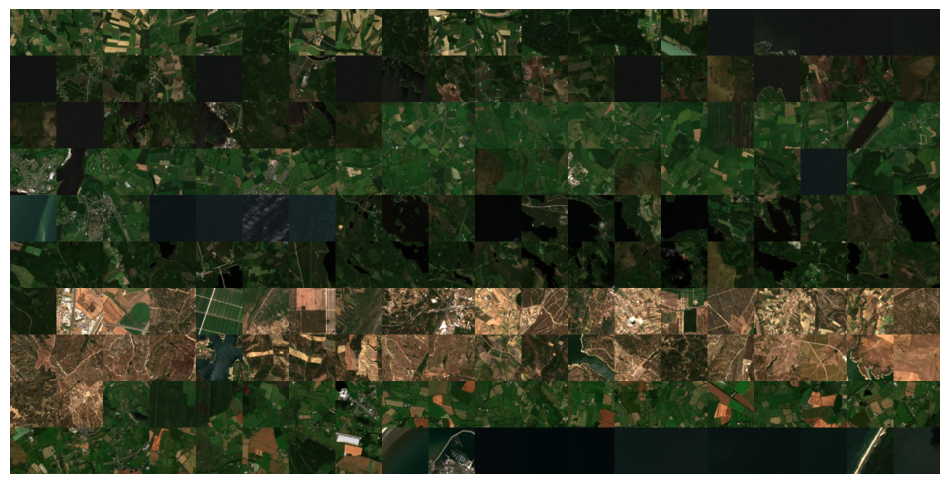

In [46]:
def generate_image_grid(directory, grid_size=(20, 10), image_size=(64, 64)):
    # Get list of image files
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg')]

    # Load images and resize them
    images = [Image.open(img).resize(image_size) for img in image_files[:grid_size[0] * grid_size[1]]]

    # Create a blank canvas for the grid
    grid_width = grid_size[0] * image_size[0]
    grid_height = grid_size[1] * image_size[1]
    grid_image = Image.new('RGB', (grid_width, grid_height))

    # Paste images into the grid
    for i, img in enumerate(images):
        x = (i % grid_size[0]) * image_size[0]
        y = (i // grid_size[0]) * image_size[1]
        grid_image.paste(img, (x, y))

    # Display the grid
    plt.figure(figsize=(12, 7))
    plt.imshow(grid_image)
    plt.axis('off')
    plt.show()

# Example usage
directory = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\50%\CombinedRGBImagesJPG'
generate_image_grid(directory)

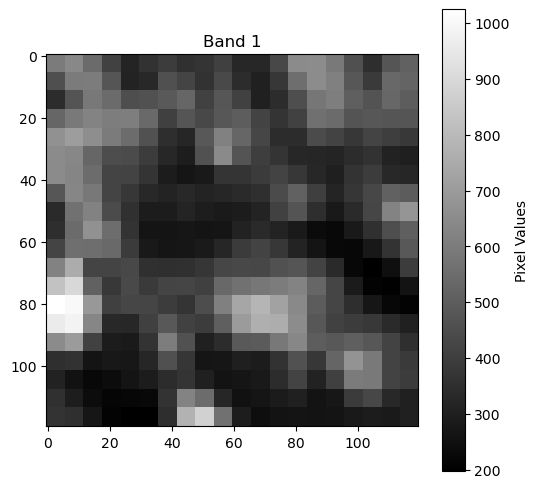

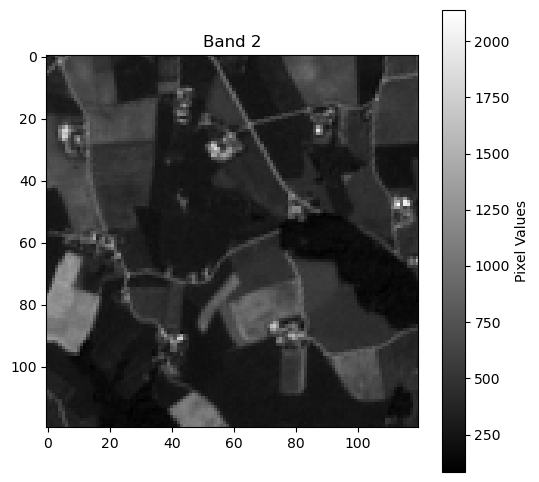

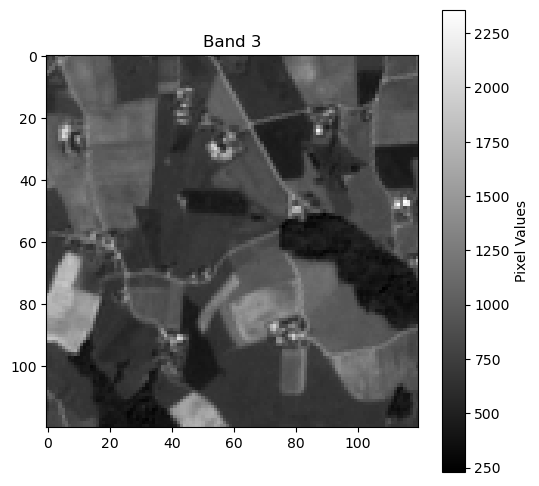

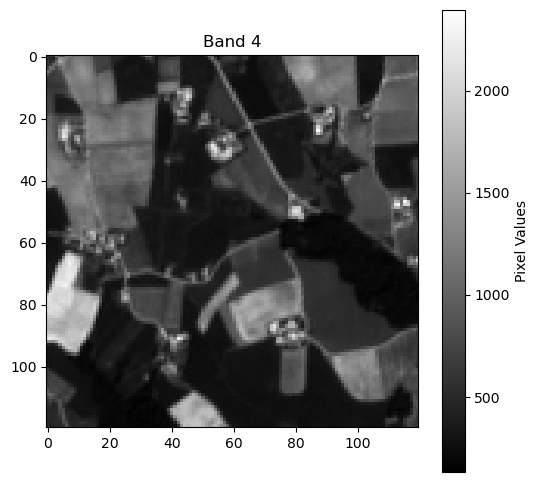

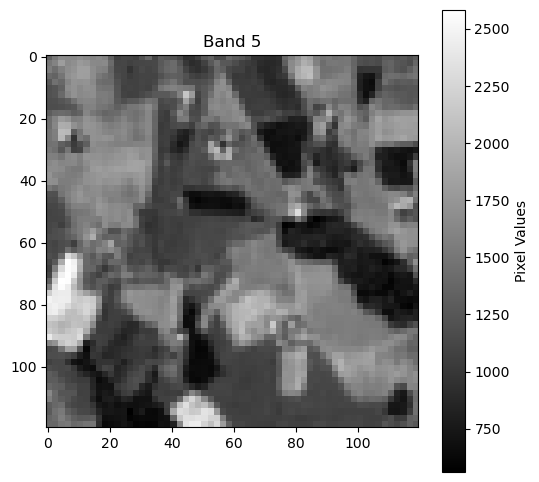

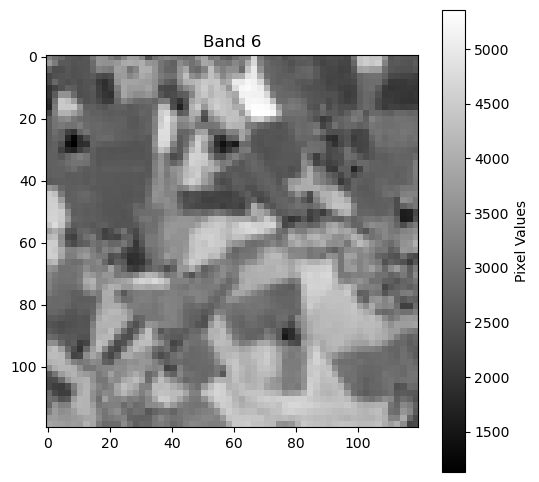

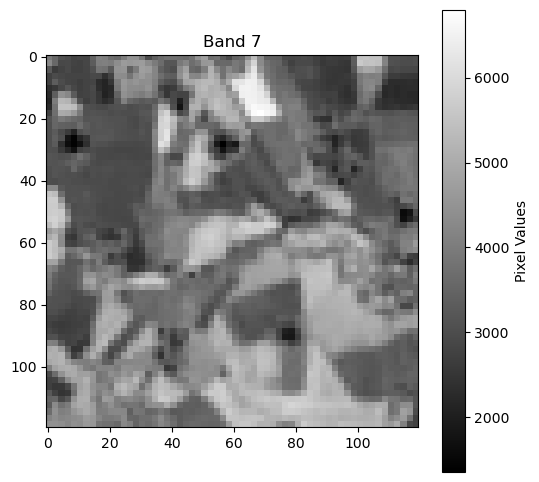

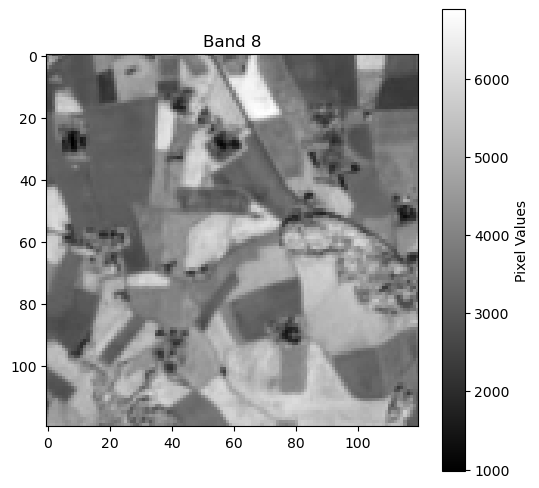

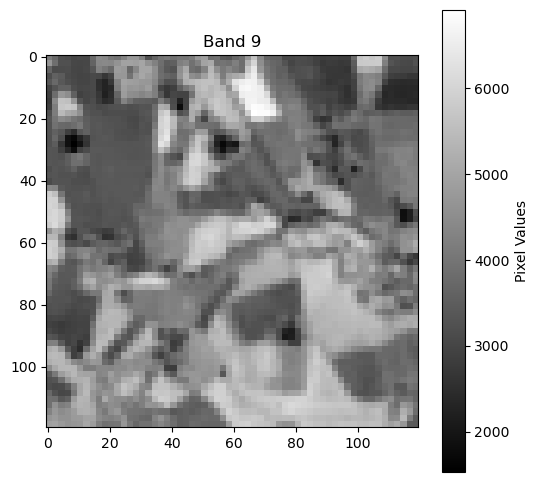

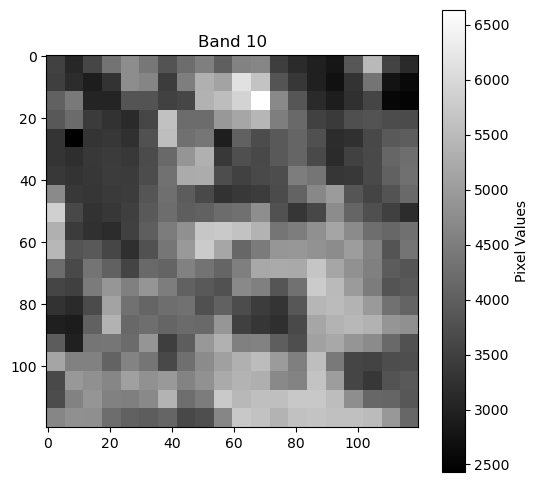

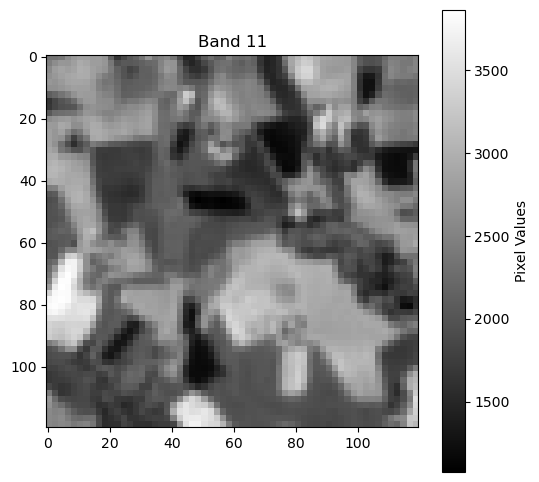

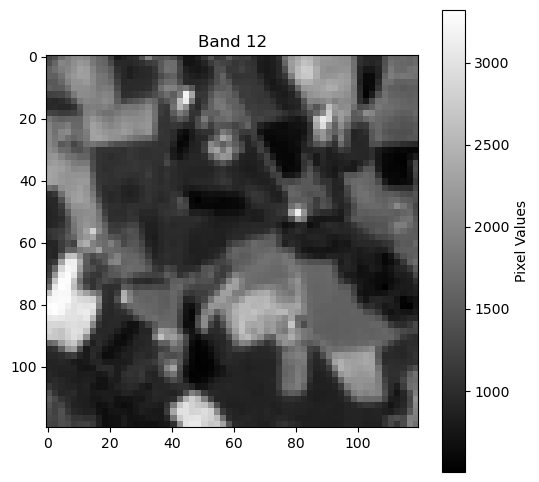

In [ ]:
# Function to display the bands of a TIFF file - example on old tif conversion

def display_tiff_bands(tiff_file_path):
    with rasterio.open(tiff_file_path) as src:
        # Get the number of bands
        num_bands = src.count

        # Loop through each band and display it
        for band in range(1, num_bands + 1):
            band_data = src.read(band)
            plt.figure(figsize=(6, 6))
            plt.imshow(band_data, cmap='gray')
            plt.title(f'Band {band}')
            plt.colorbar(label="Pixel Values")
            plt.show()

tiff_file_path = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\50%\CombinedImagesTIF\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_29_59.tif'
display_tiff_bands(tiff_file_path)

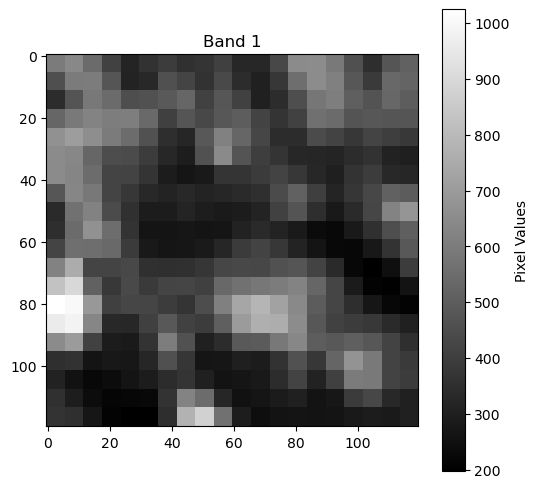

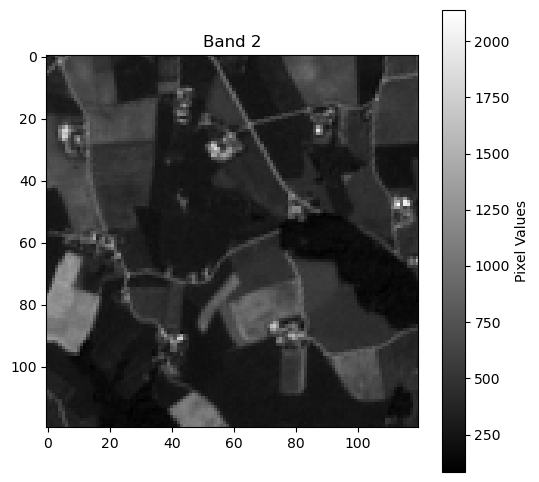

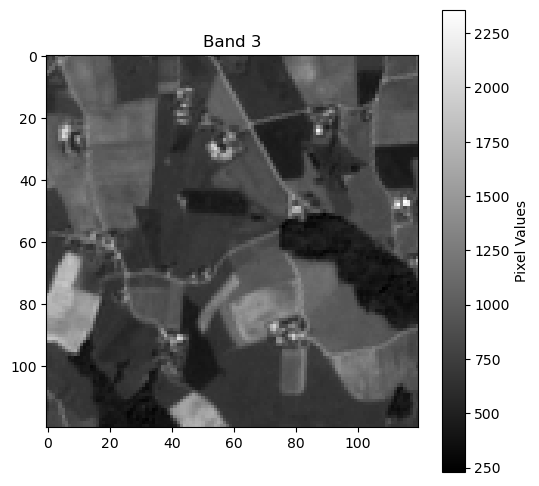

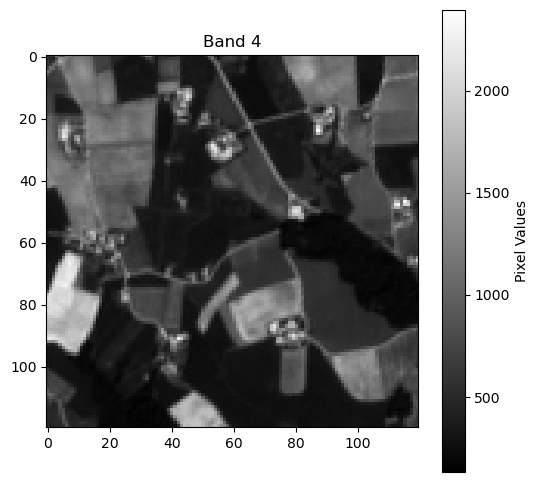

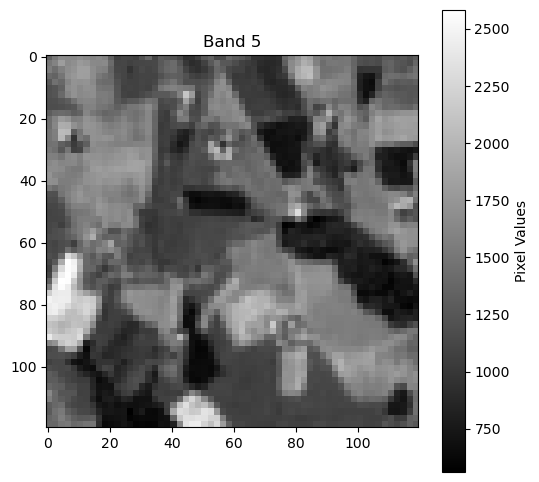

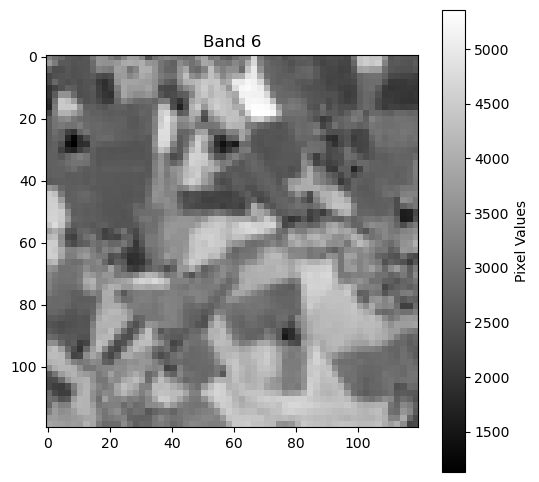

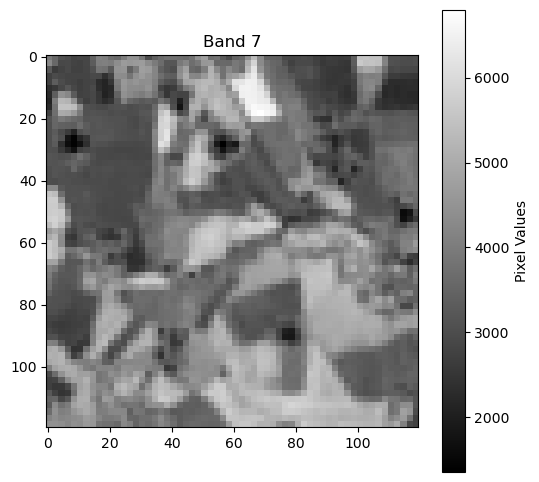

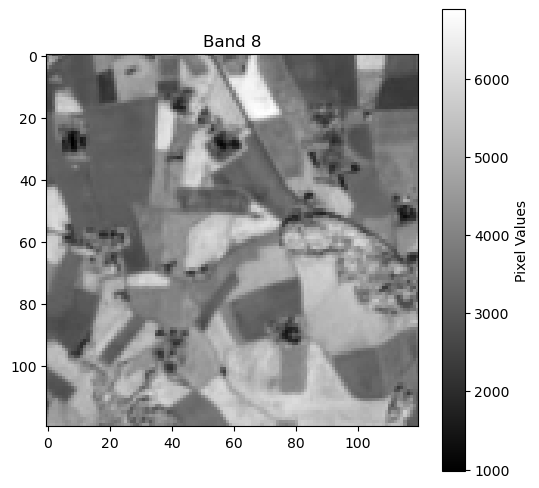

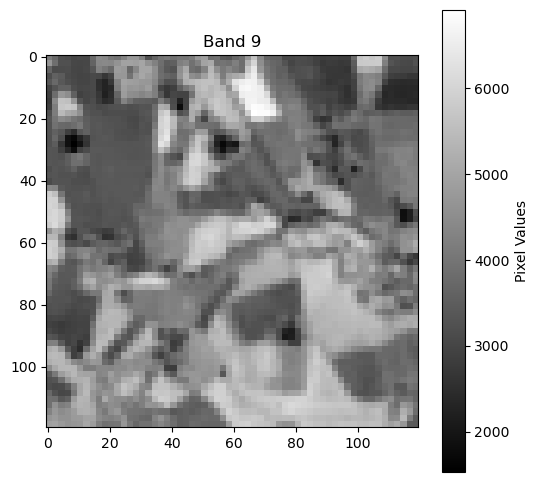

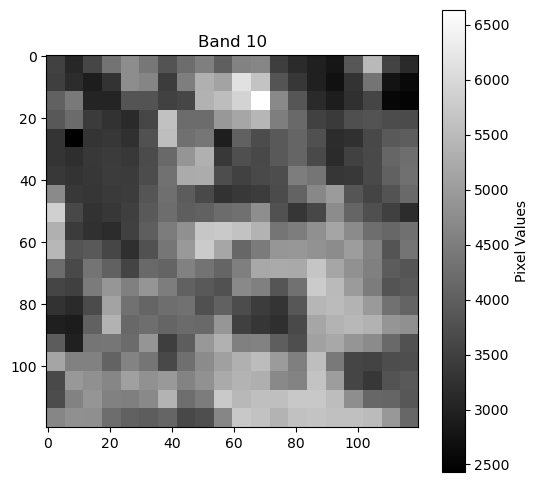

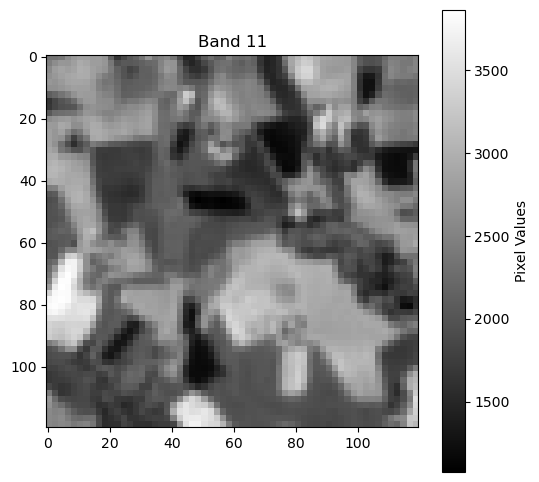

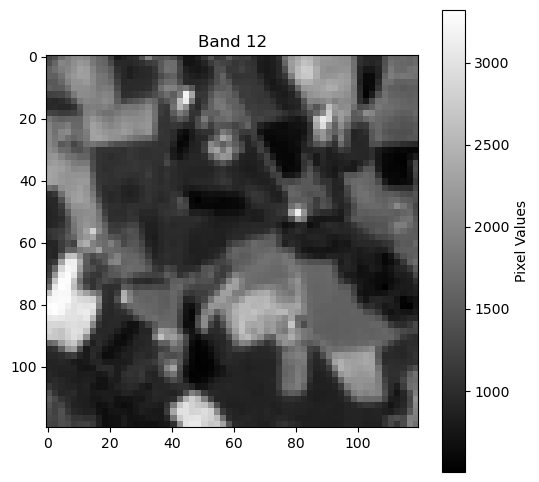

In [2]:
# Function to display the bands of a TIFF file - example on old tif conversion

def display_tiff_bands(tiff_file_path):
    with rasterio.open(tiff_file_path) as src:
        # Get the number of bands
        num_bands = src.count

        # Loop through each band and display it
        for band in range(1, num_bands + 1):
            band_data = src.read(band)
            plt.figure(figsize=(6, 6))
            plt.imshow(band_data, cmap='gray')
            plt.title(f'Band {band}')
            plt.colorbar(label="Pixel Values")
            plt.show()

tiff_file_path = r'C:\Users\isaac\Desktop\BigEarthTests\OnePBigEarthNetCopySubsets2\50_percent\CombinedImages\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_29_59.tif'
display_tiff_bands(tiff_file_path)

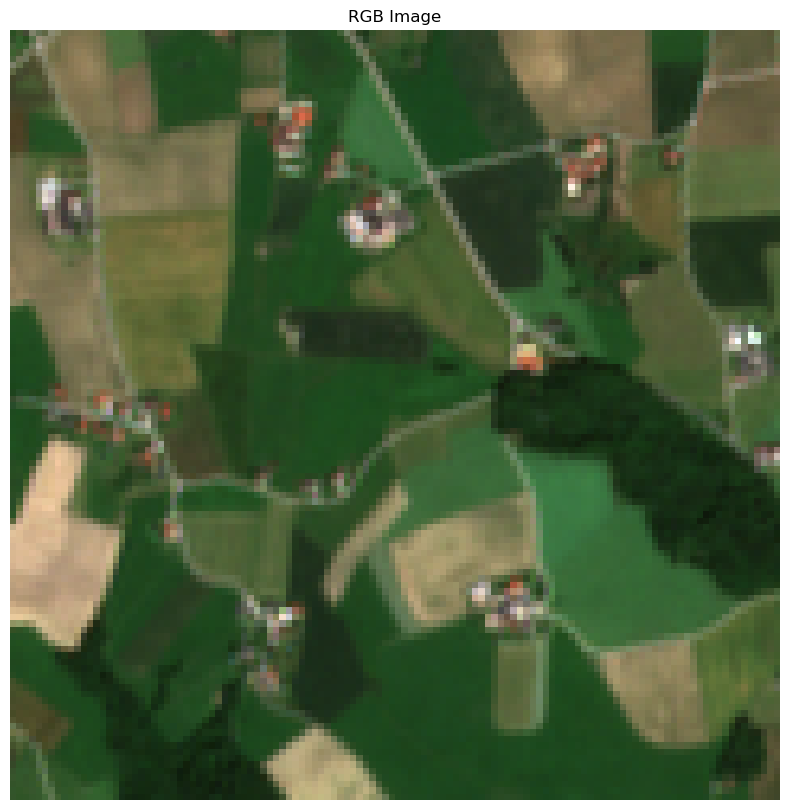

In [55]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def display_rgb_image(tiff_file_path):
    with rasterio.open(tiff_file_path) as src:
        # Read the red, green, and blue bands
        red = src.read(4)
        green = src.read(3)
        blue = src.read(2)
        
        # Normalize each band to the range 0-1
        red = red.astype(np.float32)
        green = green.astype(np.float32)
        blue = blue.astype(np.float32)
        
        red /= np.max(red)
        green /= np.max(green)
        blue /= np.max(blue)
        
        # Stack the bands into an RGB image
        rgb = np.dstack((red, green, blue))
        
        # Display the RGB image
        plt.figure(figsize=(10, 10))
        plt.imshow(rgb)
        plt.title('RGB Image')
        plt.axis('off')
        plt.show()

tiff_file_path = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\50%\CombinedImagesTIF\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_29_59.tif'
display_rgb_image(tiff_file_path)

In [27]:
import numpy as np
import rasterio
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

def display_rgb_image(tiff_file_path):
    with rasterio.open(tiff_file_path) as src:
        # Read the red, green, and blue bands
        red = src.read(4)
        green = src.read(3)
        blue = src.read(2)
        
        # Normalize each band to the range 0-1
        red = red.astype(np.float32) / np.max(red)
        green = green.astype(np.float32) / np.max(green)
        blue = blue.astype(np.float32) / np.max(blue)
        
        # Stack the bands into an RGB image
        rgb = np.dstack((red, green, blue))
    return rgb

def apply_transforms_and_display(tiff_file_path):
    # Load original image
    rgb_image = display_rgb_image(tiff_file_path)

    # Convert numpy array to PIL Image for transformations
    pil_img = Image.fromarray((rgb_image * 255).astype(np.uint8))

    # Convert PIL Image to torch.Tensor
    tensor_img = transforms.ToTensor()(pil_img)

    # Convert tensor to uint8
    tensor_img = (tensor_img * 255).byte()

    # Define the transformations and their names
    transformations = [
        transforms.RandomRotation(degrees=30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),
        transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
        transforms.RandomErasing(p=0.5, scale=(0.02, 0.33))
    ]
    
    transformation_names = [
        "RandomRotation(30)",
        "RandomResizedCrop (224)",
        "RandomHorizontalFlip",
        "RandomVerticalFlip",
        "RandomResizedCrop (256, 256)",
        "RandomAffine",
        "RandomErasing"
    ]
    
    # Create a figure with subplots (dynamic rows and columns)
    n_transforms = len(transformations)
    cols = 3
    rows = -(-n_transforms // cols) + 1  # Add 1 for the original image
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Display the original image
    axes = axes.flatten()  # Flatten axes for easy indexing
    axes[0].imshow(rgb_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Apply each transformation and display the result
    for i, (transform, name) in enumerate(zip(transformations, transformation_names), start=1):
        transformed_image = transform(tensor_img)
        transformed_image = transforms.ToPILImage()(transformed_image)
        axes[i].imshow(transformed_image)
        axes[i].set_title(name)
        axes[i].axis('off')

    # Hide any unused subplots
    for j in range(len(transformations) + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Path to your .tif file
tiff_file_path = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\50%\CombinedImagesTIF\S2B_MSIL2A_20180506T105029_N9999_R051_T31UER_79_36.tif'
apply_transforms_and_display(tiff_file_path)

: 